Palo Loui Andrae

## Situazione
I dati presenti nel file csv sono relativi agli esiti di esami citologici effettuati su cellule prelevate da probabili tumori al seno. Il set di dati contiene 212 record relativi a pazienti malate e 357 record di pazienti non malate. La colonna "Diagnosis" è un'etichetta di classe utilizzata per dividere i pazienti in malati (valore M) e sani (valore B).

## Richieste
Effettuare, se necessario, una pulizia dei dati per tenere solo quelli effettivamente necessari. Utilizzare poi il metodo K-NN (con k = 3) per vedere se ha una buona accuratezza per descrivere il fenomeno e fare previsioni. Utilizzare il 30% dei dati per il test set e il rimanente per il training set. Visualizzare anche la confusion matrix. Per semplificarsi il lavoro, seguire uno degli esempi visti in classe.
Al termine, provare a vedere che cosa prevede il modello per l'esame di una paziente con i seguenti valori:

00000, 7.76, 24.54, 47.92, 181, 0.05263, 0.04362, 0, 0, 0.1587, 0.05884, 0.3857, 1.428, 2.548, 19.15, 0.007189, 0.00466, 0, 0, 0.02676, 0.002783, 9.456, 30.37, 59.16, 268.6, 0.08996, 0.06444, 0, 0, 0.2871, 0.07039

Materiale da consegnare
Allegare al presente compito il notebook .ipynb realizzato per rispondere alle richieste. Chiamare il file con il proprio cognome. Utilizzare Jupiter come IDE e commentare le varie fasi del procedimento.

In [1]:
import pandas as pd
df = pd.read_csv('data/Palo Loui.Andrae - data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
print(df.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


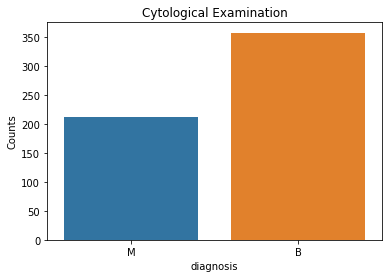

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="diagnosis", data=df)
plt.title("Cytological Examination")
plt.xlabel("diagnosis")
plt.ylabel("Counts")
plt.show()

In [5]:
df1 = df.drop(columns=['id'])
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df1['diagnosis'].head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [7]:
df1['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df1 = df1.dropna(how='any',axis=0) 
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
import numpy as np
dfnp = df1.to_numpy()
dfnp

array([[ 1.     , 17.99   , 10.38   , ...,  0.2654 ,  0.4601 ,  0.1189 ],
       [ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
       [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
       ...,
       [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
       [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
       [ 0.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]])

In [10]:
x=dfnp[:,1:] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,0] # prendiamo solo l'ultima colonna -> variabile dipendente, target
x,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
        1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1

In [11]:
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[  17.99       10.38      122.8      1001.          0.1184      0.2776
     0.3001      0.1471      0.2419      0.07871     1.095       0.9053
     8.589     153.4         0.006399    0.04904     0.05373     0.01587
     0.03003     0.006193   25.38       17.33      184.6      2019.
     0.1622      0.6656      0.7119      0.2654      0.4601      0.1189  ]
 [  20.57       17.77      132.9      1326.          0.08474     0.07864
     0.0869      0.07017     0.1812      0.05667     0.5435      0.7339
     3.398      74.08        0.005225    0.01308     0.0186      0.0134
     0.01389     0.003532   24.99       23.41      158.8      1956.
     0.1238      0.1866      0.2416      0.186       0.275       0.08902 ]
 [  19.69       21.25      130.       1203.          0.1096      0.1599
     0.1974      0.1279      0.2069      0.05999     0.7456      0.7869
     4.585      94.03        0.00615     0.04006     0.03832     0.02058
     0.0225      0.004571   23.57       25.53      152.5      1

In [12]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [14]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]


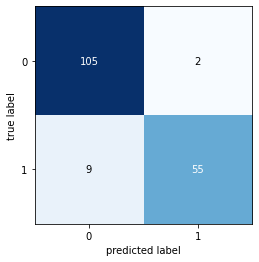

In [15]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Blues)
plt.show()

In [16]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       107
         1.0       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [17]:
from tabulate import tabulate

info = ["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"] # nome delle misurazioni
Maria= [00000, 7.76, 24.54, 47.92, 181, 0.05263, 0.04362, 0, 0, 0.1587, 0.05884, 0.3857, 1.428, 2.548, 19.15, 0.007189, 0.00466, 0, 0, 0.02676, 0.002783, 9.456, 30.37, 59.16, 268.6, 0.08996, 0.06444, 0, 0, 0.2871, 0.07039] # valore delle misurazioni
print(tabulate([Maria], headers=info))

  diagnosis    radius_mean    texture_mean    perimeter_mean    area_mean    smoothness_mean    compactness_mean    concavity_mean    concave points_mean    symmetry_mean    fractal_dimension_mean    radius_se    texture_se    perimeter_se    area_se    smoothness_se    compactness_se    concavity_se    concave points_se    symmetry_se    fractal_dimension_se    radius_worst    texture_worst    perimeter_worst    area_worst    smoothness_worst    compactness_worst    concavity_worst    concave points_worst    symmetry_worst    fractal_dimension_worst
-----------  -------------  --------------  ----------------  -----------  -----------------  ------------------  ----------------  ---------------------  ---------------  ------------------------  -----------  ------------  --------------  ---------  ---------------  ----------------  --------------  -------------------  -------------  ----------------------  --------------  ---------------  -----------------  ------------  --------------

In [18]:
# previsione per Maria
Maria = [[7.76, 24.54, 47.92, 181, 0.05263, 0.04362, 0, 0, 0.1587, 0.05884, 0.3857, 1.428, 2.548, 19.15, 0.007189, 0.00466, 0, 0, 0.02676, 0.002783, 9.456, 30.37, 59.16, 268.6, 0.08996, 0.06444, 0, 0, 0.2871, 0.07039]]
predictMaria = neigh.predict(Maria)
predictMaria

array([0.])

In [21]:
def find_k(training_set_X, training_set_y, testing_set_X, testing_set_y, max_k=11):
    y = [0,0]
    for i in range(1,int(max_k)+1,2):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(training_set_X, training_set_y)
        predict_knn = neigh.predict(testing_set_X)
        x = [i, float(classification_report(testing_set_y, predict_knn, output_dict=True).get("accuracy"))]
        if (x[1] > y[1]):
            y = x
        else:
            pass
    print(f'{y[0]} => {y[1]}')
find_k(X_train, y_train, X_test, y_test,max_k= 20)

5 => 0.9532163742690059
